# I. Perkenalan
Nama: Daffa Ilham
Batch-27


## Goals
Pada kasus kali ini Saya sebagai seorang Business Analyst akan melakukan identifikasi Customer dengan melakukan Segmentation dari data kartu kredit sebuah bank yang sudah disiapkan. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

# II. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pickle
import matplotlib.pyplot as plt
#from google.colab import auth
#from google.cloud import bigquery
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# III. Query SQL

In [ ]:
auth.authenticate_user()

project_id = "carbon-nucleus-403108"
client = bigquery.Client(project=project_id)
df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_027_rmt.credit-card-information`
WHERE MOD(CAST(CUST_ID AS INT64), 2) = 1
''').to_dataframe()

# Convert into DataFrame
df

In [ ]:
# Tampilkan 10 data pertama
df.head()

In [ ]:
df.tail()

In [3]:
# Export data
df = pd.read_csv(r'C:\Users\yossy\github-classroom\FTDS-assignment-bay\p1-ftds027-rmt-g6-Daffailh27\P1G6_Set_1_Daffa Ilham.csv')

# IV. EDA

In [4]:
# mengidentifikasi info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        4475 non-null   int64  
 1   CUST_ID                           4475 non-null   int64  
 2   BALANCE                           4475 non-null   float64
 3   BALANCE_FREQUENCY                 4475 non-null   float64
 4   PURCHASES                         4475 non-null   float64
 5   ONEOFF_PURCHASES                  4475 non-null   float64
 6   INSTALLMENTS_PURCHASES            4475 non-null   float64
 7   CASH_ADVANCE                      4475 non-null   float64
 8   PURCHASES_FREQUENCY               4475 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 12  CASH_A

In [5]:
# Cek missing value
df.isna().mean()*100

Unnamed: 0                          0.000000
CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.463687
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

ada missing value dalam `MINIMUM PAYMENT'

In [6]:
df.describe()

,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,2237.000000,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,1291.965557,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,1118.500000,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,2237.000000,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,3355.500000,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,4474.000000,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


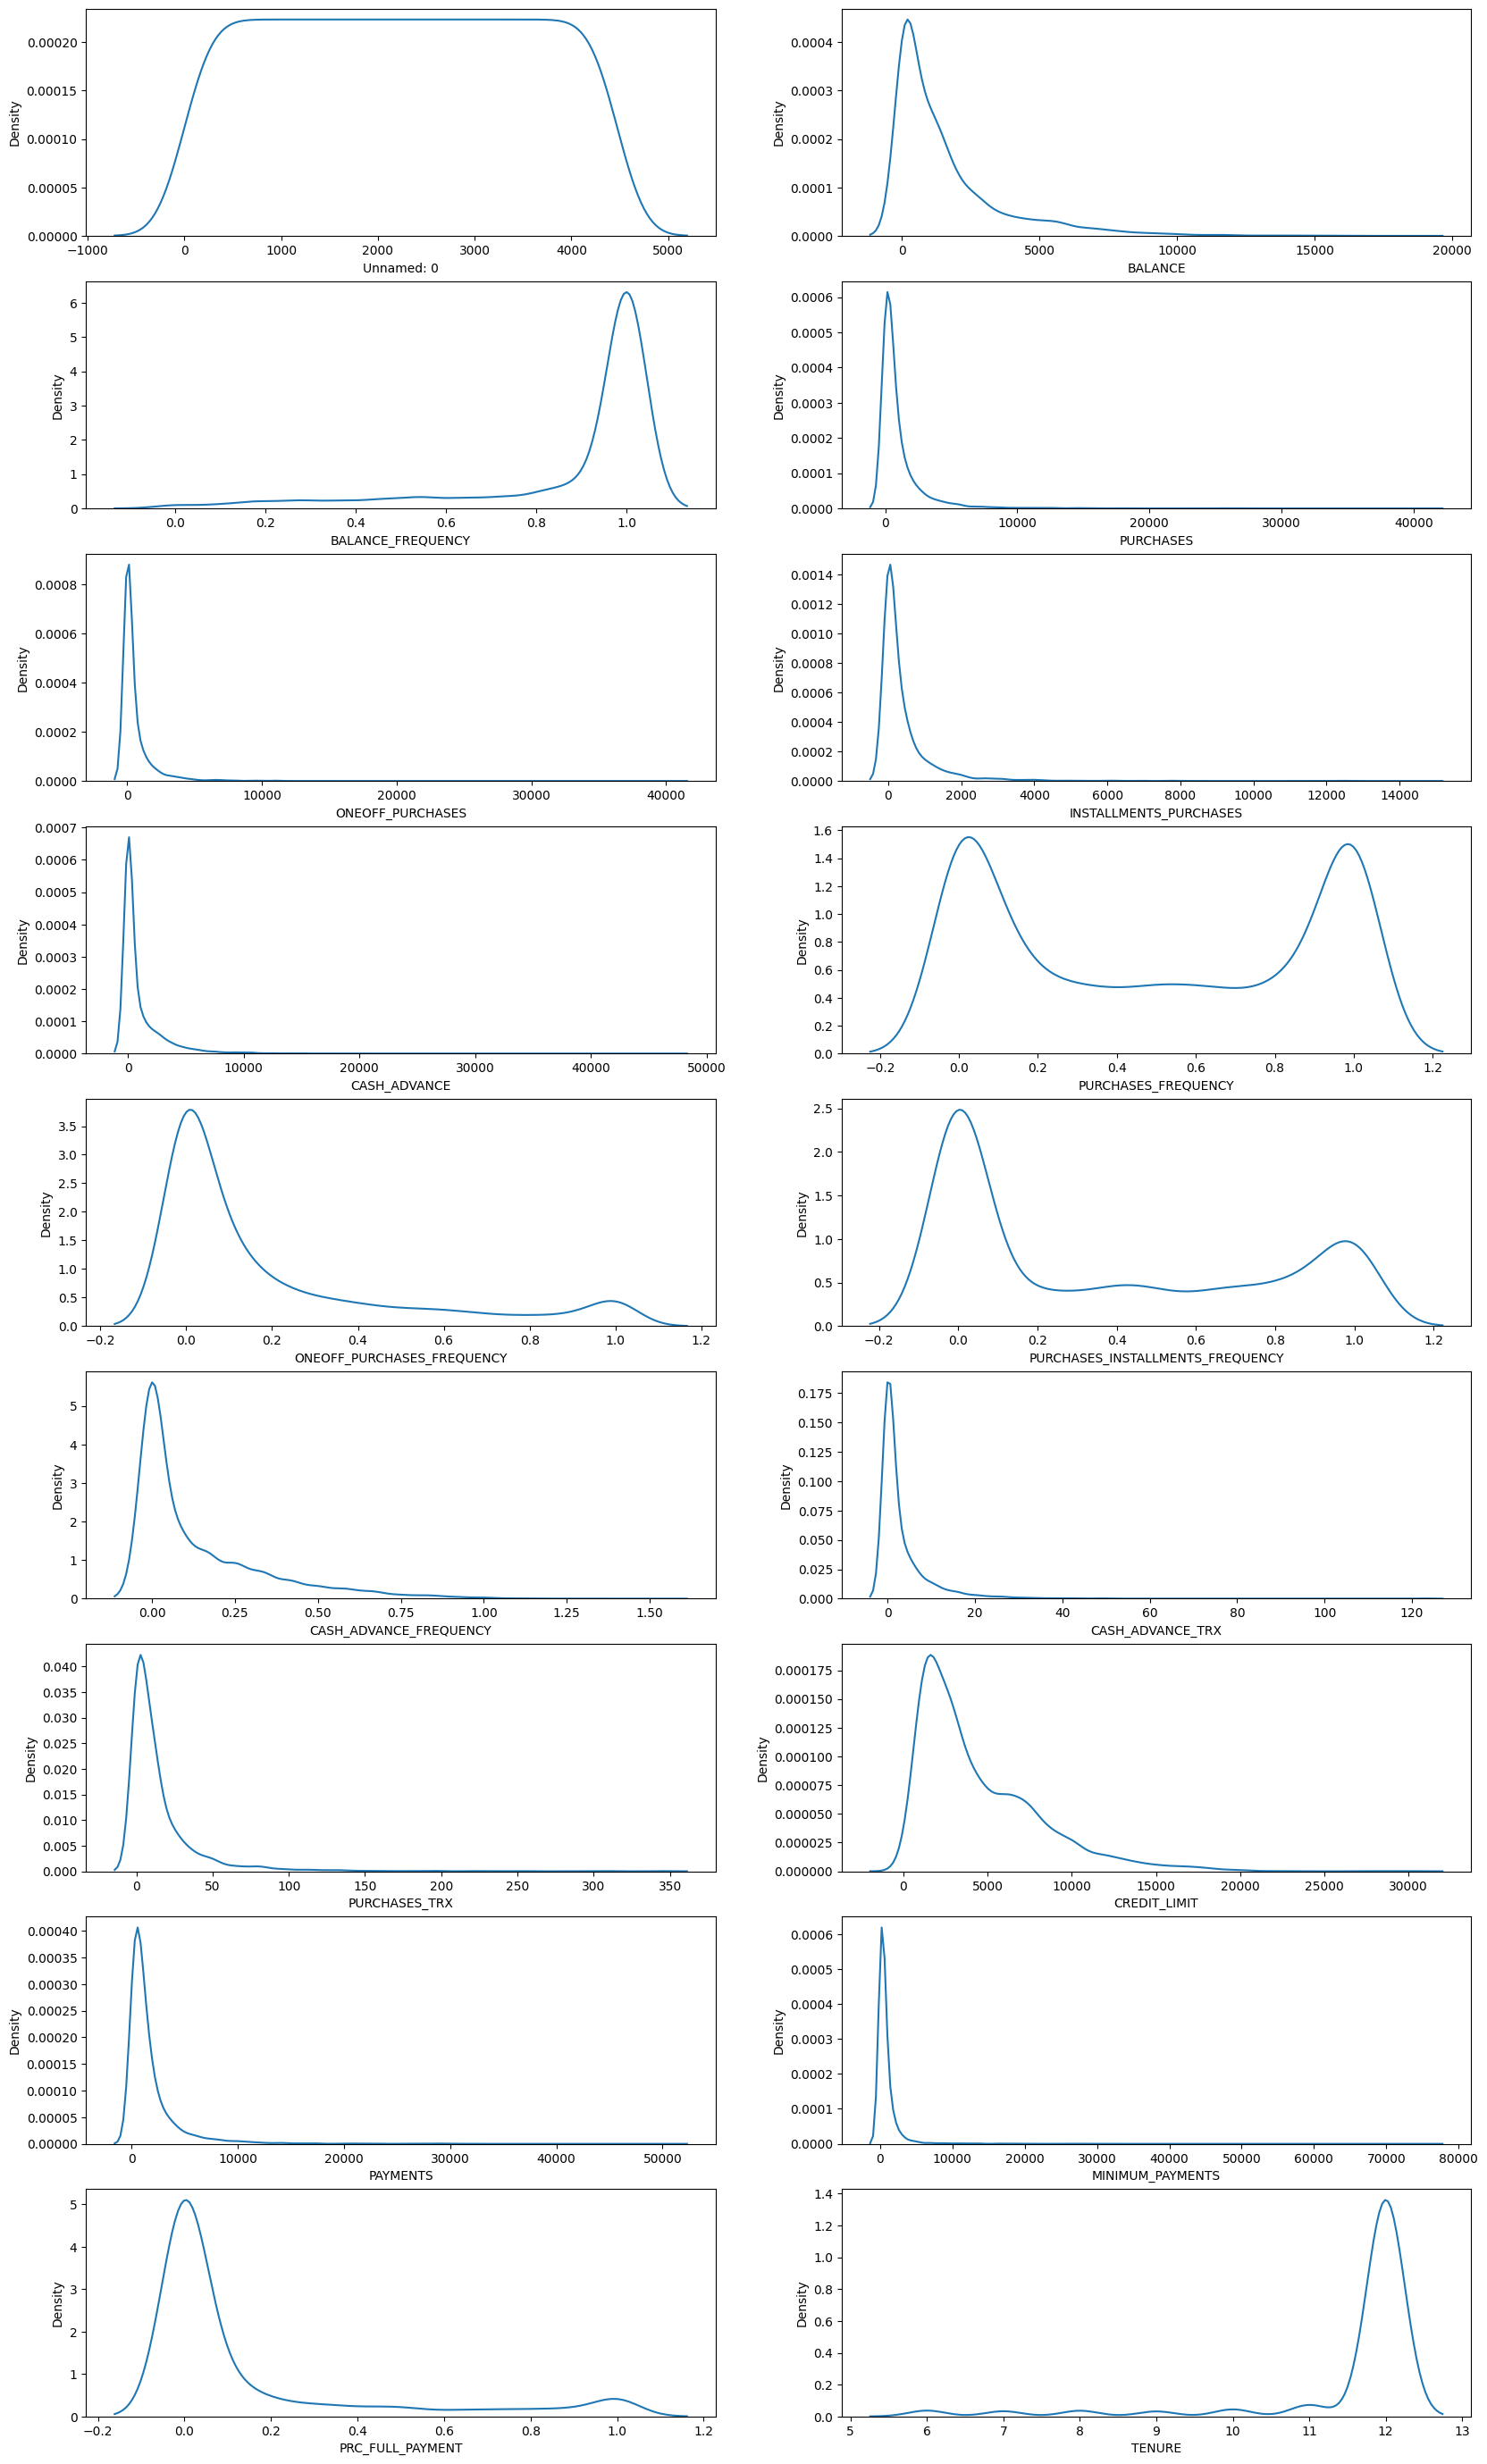

In [7]:
# cek distribusi pada dataset
dfnocustid = df.drop('CUST_ID', axis=1)
plt.figure(figsize=(20,35))
for i, col in enumerate(dfnocustid.columns):
    if dfnocustid[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
plt.savefig(r'C:\Users\yossy\github-classroom\FTDS-assignment-bay\p1-ftds027-rmt-g6-Daffailh27ClassDist.png')
plt.show()

## Insights

Insight Bisnis:

- Skewness dan Pengeluaran: Variabel seperti `BALANCE`, `PURCHASES`, dan `PAYMENTS` menunjukkan skewness positif yang kuat, artinya sebagian besar pelanggan memiliki nilai yang relatif rendah untuk saldo, pembelian, dan pembayaran, dengan sejumlah kecil pelanggan yang memiliki nilai yang sangat tinggi. Ini bisa menandakan bahwa ada segmen pelanggan yang lebih kecil yang bertanggung jawab atas sebagian besar pengeluaran, yang mungkin merupakan target yang menarik untuk program loyalitas atau penawaran eksklusif.

- Cash Advance: Tingginya skewness pada `CASH_ADVANCE` menunjukkan bahwa sebagian besar pelanggan tidak sering menggunakan fasilitas uang muka tunai. Pelanggan yang sering menggunakan uang muka tunai mungkin mengalami kesulitan keuangan atau preferensi untuk transaksi tunai, dan mungkin memerlukan produk atau layanan keuangan yang berbeda.

- Pembelian Cicilan: Variabel `INSTALLMENTS_PURCHASES` juga menunjukkan skewness positif. Ini bisa berarti bahwa pembelian cicilan lebih jarang terjadi di antara pelanggan, tapi ketika dilakukan, nilainya bisa cukup besar. Pemahaman ini dapat digunakan untuk menyesuaikan penawaran pembelian cicilan atau promosi yang sesuai dengan kebiasaan belanja pelanggan.

Insight Teknikal:

- Normalisasi Data: Skewness yang signifikan mengindikasikan bahwa data mungkin perlu dinormalisasi atau ditransformasi sebelum digunakan dalam model clustering.

- Feature Scaling: Mengingat rentang yang sangat bervariasi antar variabel, scaling (seperti Standard Scaling atau Min-Max Scaling) menjadi penting sebelum melakukan clustering untuk memastikan bahwa semua fitur diberikan bobot yang sama oleh algoritma.


- Outlier Detection and Handling: Outlier yang signifikan bisa mempengaruhi pembentukan cluster. Penting untuk mendeteksi dan menentukan bagaimana menangani outlier ini, apakah dengan menghapusnya atau menggunakan teknik yang lebih robust terhadap outlier.

- Feature Engineering: perlu dilakukan feature engineering untuk mengekstrak informasi yang lebih berguna dari data, seperti rasio pembayaran terhadap saldo, yang mungkin memiliki distribusi yang lebih normal dan informatif untuk segmentasi pelanggan.



diputuskan untuk mengecek secara detail skewness yang terjadi pada features yang lain

In [8]:
# Cek skewness fitur-fitur lainnya

print('Skewness BALANCE_FREQUENCY:', df['BALANCE_FREQUENCY'].skew())
print('Skewness ONEOFF_PURCHASES:', df['ONEOFF_PURCHASES'].skew())
print('Skewness INSTALLMENTS_PURCHASES:', df['INSTALLMENTS_PURCHASES'].skew())
print('Skewness CASH_ADVANCE:', df['CASH_ADVANCE'].skew())
print('Skewness PURCHASES_FREQUENCY:', df['PURCHASES_FREQUENCY'].skew())
print('Skewness ONEOFF_PURCHASES_FREQUENCY:', df['ONEOFF_PURCHASES_FREQUENCY'].skew())
print('Skewness PURCHASES_INSTALLMENTS_FREQUENCY:', df['PURCHASES_INSTALLMENTS_FREQUENCY'].skew())
print('Skewness CASH_ADVANCE_FREQUENCY:', df['CASH_ADVANCE_FREQUENCY'].skew())
print('Skewness CASH_ADVANCE_TRX:', df['CASH_ADVANCE_TRX'].skew())
print('Skewness PURCHASES_TRX:', df['PURCHASES_TRX'].skew())
print('Skewness CREDIT_LIMIT:', df['CREDIT_LIMIT'].skew())
print('Skewness MINIMUM_PAYMENTS:', df['MINIMUM_PAYMENTS'].skew())
print('Skewness PRC_FULL_PAYMENT:', df['PRC_FULL_PAYMENT'].skew())
print('Skewness TENURE:', df['TENURE'].skew())

Skewness BALANCE_FREQUENCY: -2.026529776439142
Skewness ONEOFF_PURCHASES: 9.951056583113456
Skewness INSTALLMENTS_PURCHASES: 6.330629906494809
Skewness CASH_ADVANCE: 5.638109294257693
Skewness PURCHASES_FREQUENCY: 0.05875497991848613
Skewness ONEOFF_PURCHASES_FREQUENCY: 1.5483193819148602
Skewness PURCHASES_INSTALLMENTS_FREQUENCY: 0.5082957786202944
Skewness CASH_ADVANCE_FREQUENCY: 1.8342106501962343
Skewness CASH_ADVANCE_TRX: 6.420103784668197
Skewness PURCHASES_TRX: 4.747507133980154
Skewness CREDIT_LIMIT: 1.498947716941148
Skewness MINIMUM_PAYMENTS: 14.669771084332645
Skewness PRC_FULL_PAYMENT: 1.9752382754788178
Skewness TENURE: -2.954158581529189


## Insights

Skewed Columns: Variabel-variabel yang memiliki skewness tinggi akan di-scale menggunakan RobustScaler, sehingga median dari setiap kolom tersebut sekarang menjadi 0, dan kuartil pertama (25%) dan ketiga (75%) menjadi -1 dan 1, masing-masing. Hal ini mengurangi pengaruh dari outliers pada data yang skewed. selain`PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY`

Normal-like Columns: Kolom dengan distribusi yang mendekati normal akan di-scale menggunakan MinMaxScaler. Ini menormalkan rentang data ke antara 0 dan 1, dengan nilai minimum menjadi 0 dan nilai maksimum menjadi 1. `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` yang akan discale dengan MinMaxScaler

In [9]:
# Drop the 'Unnamed: 0' karena tidak perlu
df.drop('Unnamed: 0', axis=1, inplace=True)

cek sebaran data dengan scatterplot

<Axes: xlabel='BALANCE', ylabel='PAYMENTS'>

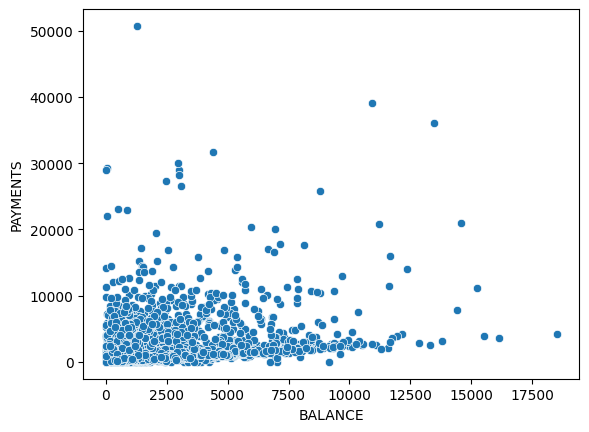

In [10]:
# cek balance dan payments
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS')

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

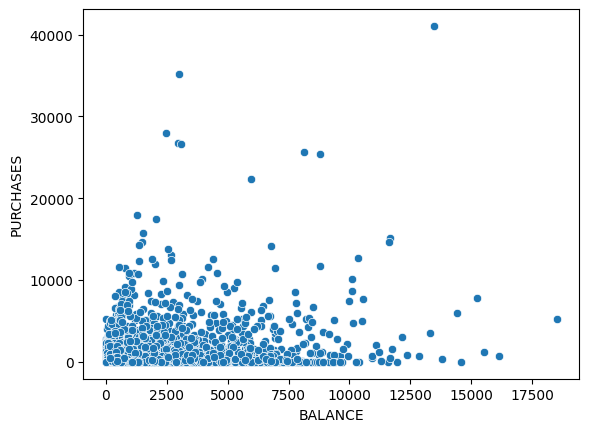

In [11]:
# cek balance dan purchases
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES')

<Axes: xlabel='PURCHASES', ylabel='PAYMENTS'>

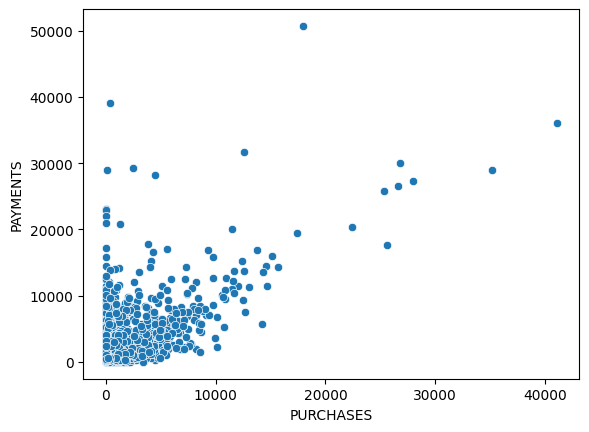

In [12]:
# cek balance dan payments
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS')

## Insights

Insight Bisnis:

- Segmentasi Pelanggan: Pelanggan dengan saldo tinggi tidak selalu memiliki pembelian atau pembayaran yang tinggi, yang bisa menunjukkan segmen pelanggan yang 'tidur' atau berisiko tinggi karena saldo besar mereka tidak digunakan atau dibayar.

- Kebijakan Kredit: Scatterplot antara 'BALANCE' dan 'PURCHASES' menunjukkan bahwa tidak semua pelanggan dengan saldo besar melakukan pembelian besar, yang bisa menandakan peluang untuk menyesuaikan limit kredit atau menawarkan insentif untuk meningkatkan penggunaan.

- Perilaku Pembayaran: Pelanggan yang melakukan pembelian besar cenderung juga melakukan pembayaran besar, menunjukkan perilaku pembayaran yang bertanggung jawab atau kemungkinan penggunaan fasilitas cicilan.

- Strategi Pemasaran: Pelanggan dengan pembelian besar dan pembayaran besar mungkin merupakan target yang baik untuk promosi dan penawaran, karena mereka menunjukkan keterlibatan yang lebih tinggi dengan produk kartu kredit.

Insight Teknikal:

- Korelasi dan Distribusi: Scatterplot menunjukkan hubungan antara variabel-variabel tersebut. Distribusi titik-titik dalam plot menunjukkan adanya korelasi positif antara 'PURCHASES' dan 'PAYMENTS', yang masuk akal karena pembayaran cenderung meningkat seiring dengan jumlah pembelian. Namun, hubungan antara 'BALANCE' dan 'PAYMENTS' serta 'BALANCE' dan 'PURCHASES' tampak lebih lemah.

- Outliers: Ada beberapa titik yang berada jauh dari kumpulan data utama, menunjukkan adanya outliers. Ini bisa menunjukkan pelanggan yang memiliki kebiasaan penggunaan kartu kredit yang sangat berbeda dari kebanyakan pelanggan lainnya.

- Fitur untuk Segmentasi: Dari scatterplot, 'PURCHASES' dan 'PAYMENTS' mungkin menjadi fitur yang baik untuk segmentasi pelanggan, karena mereka menunjukkan variasi yang signifikan di antara pelanggan dan korelasi yang kuat, yang bisa menandakan perilaku pembelian atau pembayaran.

# V. Feature Engineering

In [13]:
# Copy ke dataframe baru untuk backup

df_original = df.copy()

## Handle Missing Value

In [14]:
# Handling missing value `MINIMUM_PAYMENTS` dengan imputasi rata-rata

df_original['MINIMUM_PAYMENTS'].fillna(df_original['MINIMUM_PAYMENTS'].median(), inplace=True)

In [15]:
# SCALING
# Pemisahan fitur-fitur

df1RobScl = df_original.drop(['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis=1)
df1MiMaScl = df_original[['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]


In [16]:
# Penyimpanan nama-nama kolom yang discale dengan RobustScaler
df1RobSclCol = df1RobScl.columns.tolist()
df1RobSclCol

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [17]:
# Definisikan scalernya

Mscaler = MinMaxScaler()
Rscaler = RobustScaler()

# Mulai scaling
Rscaler.fit(df1RobScl)
Mscaler.fit(df1MiMaScl)


df1RobScled = Rscaler.transform(df1RobScl)
df1MiMaScled = Mscaler.transform(df1MiMaScl)

# Buat dataframe baru dari data-data yang telah discale
df1RobScledDF = pd.DataFrame(df1RobScled, columns = df1RobSclCol)
df1MiMaScledDF = pd.DataFrame(df1MiMaScled, columns = ['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'])

# Gabungkan dataframe baru yang telah discale
df_scaled = pd.concat([df1RobScledDF, df1MiMaScledDF], axis=1)

In [18]:
# tampilkan 10 data atas
df_scaled.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,-0.309343,-0.451097,-7.875008,-0.296370,-0.001130,-0.194391,0.0,0.166668,0.0,0.0,-0.3750,-0.510204,-0.571776,0.000000,0.0,-4.0,0.125,0.0
1,0.132767,-0.453090,-9.000009,-0.173090,0.226661,-0.194391,0.0,0.166668,0.0,0.0,-0.3750,0.816327,-0.571776,0.000000,0.0,-4.0,0.125,0.0
2,0.357622,-0.058961,-1.125001,-0.190618,0.194273,-0.194391,0.0,0.166668,0.0,0.0,-0.0625,-0.367347,0.402028,3.776822,0.0,-4.0,0.125,0.0
3,0.405901,-0.315520,-5.625006,0.743278,1.919874,-0.194391,0.0,0.166668,0.0,0.0,-0.3750,-0.367347,1.402169,-0.371329,0.0,-4.0,0.125,0.0
4,0.733125,-0.223979,0.000000,0.225806,0.963718,-0.194391,0.0,0.166668,0.0,0.0,-0.3750,-0.408163,-0.431475,-0.286166,0.0,-4.0,0.125,0.0


# Model Training

## PCA
akan dilakukan PCA terhadap data yang sudah discale tadi

In [19]:
# Define PCA

# Initialize PCA and fit the scaled data
pca = PCA()
# masukkan ke df_pca
df_pca = pca.fit_transform(df_scaled)


In [20]:
# Convert to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC' + str(i+1) for i in range(len(df_scaled.columns))])

# Display the explained variance ratio of the PCA components
explained_variance_ratio = pca.explained_variance_ratio_

# Display the DataFrame of PCA components
df_pca.head(), explained_variance_ratio

(        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0 -3.374864  0.840874 -2.158684  1.866752  5.780355  2.159552 -2.998151   
 1 -3.293811  0.631414 -2.304920  1.962003  6.824175  2.501936 -2.883574   
 2  0.620532  3.025809 -1.365283  1.318926  0.449520 -0.437715 -2.868052   
 3 -1.605843 -1.036600 -0.899267  2.169190  4.619766  1.007432 -2.591263   
 4 -1.850923  0.052392 -0.222016  1.766304 -0.826749 -0.846792 -3.199061   
 
         PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
 0 -0.028118 -0.726297  0.423738 -0.326157 -0.037492 -0.292227 -0.321861   
 1 -0.248526 -0.980198 -0.059223 -0.816651 -0.417683  0.221566  0.612668   
 2  1.649574 -0.501328  1.456519 -0.031638 -0.309052  0.308199  0.013879   
 3  1.393056 -0.292998  1.135234 -0.331176 -0.304187  0.385823 -0.282740   
 4  1.705544  0.003847  0.708148  0.008798  0.076085  0.717525  0.050400   
 
        PC15      PC16      PC17      PC18  
 0  0.274626  0.284567 -0.021685  0.000

Analisis Komponen Utama (PCA) telah diterapkan pada data yang telah diimputasi dan di-scale. Hasil PCA menghasilkan 18 komponen utama yang mewakili data asli. Berikut adalah beberapa insight dari hasil PCA:

Komponen Utama (PC1 - PC18): PCA mengkonversi data asli ke dalam set baru dari variabel yang tidak berkorelasi yang disebut komponen utama. Komponen pertama (PC1) menyumbang variasi terbesar, diikuti oleh PC2, dan seterusnya.

Varian yang Dijelaskan: Proporsi varian yang dijelaskan oleh masing-masing komponen utama diberikan oleh explained_variance_ratio_. PC1 menjelaskan sekitar 29.59% varian dalam data, PC2 menjelaskan sekitar 23.39%, dan seterusnya.

Berdasarkan rasio varian yang dijelaskan,  dapat diputuskan berapa banyak komponen utama yang ingin dipertahankan untuk analisis lebih lanjut. pada kasus ini dengan memilih jumlah komponen yang cukup untuk menjelaskan sebagian besar varian dalam data. Pada kasus ini akan dilakukan keep data sebesar 91% dan 8 komponen utama

In [21]:
# Cek jumlah fitur untuk mempertahankan 91% informasi

cumSum = np.cumsum(pca.explained_variance_ratio_)
numFeatures = np.argmax(cumSum >= 0.91) + 1
numFeatures

8

In [22]:
# Redefine PCA dengan 5 komponen

pcaFiveComp = PCA(n_components=5)
pcaFiveComp.fit(df_pca)

PCA(n_components=5)

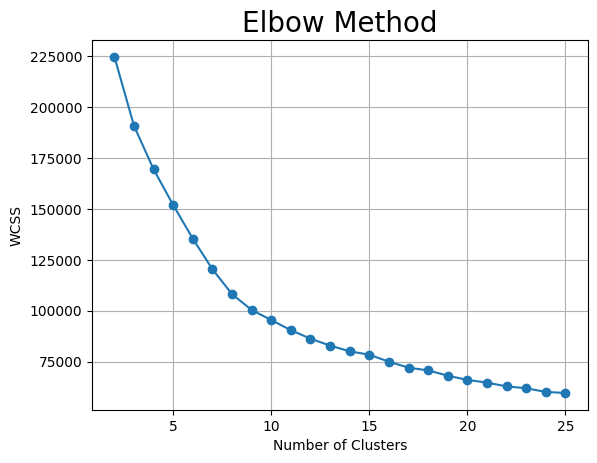

In [23]:
# Elbow Method untuk meninjau jumlah cluster yang optimal

wcss = []
random_state = 10
max_cluster = 25
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Insighs
Berdasarkan grafik Elbow Method, rekomendasi untuk jumlah cluster dalam K-Means dapat diberikan sebagai berikut:

- Insight Teknikal:

 Elbow Point: Grafik menunjukkan penurunan Within-Cluster Sum of Squares (WCSS) yang tajam dari 1 hingga sekitar 5 cluster dan kemudian penurunan menjadi lebih lambat. Elbow point, titik di mana penurunan WCSS mulai melambat, terlihat sekitar 5 cluster. Ini menunjukkan bahwa penambahan cluster tambahan setelah 5 tidak memberikan perbaikan yang signifikan dalam variasi data yang dijelaskan.

- Insights Bisnis:
 Segmentasi Pelanggan: Dengan 5 segmen pelanggan, bank dapat menargetkan strategi pemasaran dan produk yang lebih spesifik yang disesuaikan dengan kebutuhan dan perilaku dari masing-masing segmen ini. Misalnya, segmen dengan saldo tinggi dan pembayaran rendah mungkin memerlukan strategi retensi yang berbeda dibandingkan dengan segmen dengan saldo rendah namun pembayaran aktif.

- Langkah Selanjutnya:
 Validasi: Validasi jumlah cluster dengan metode Silhouette Score untuk membantu memastikan bahwa segmentasi ini memiliki relevansi statistik.

## Sillhoutte

c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

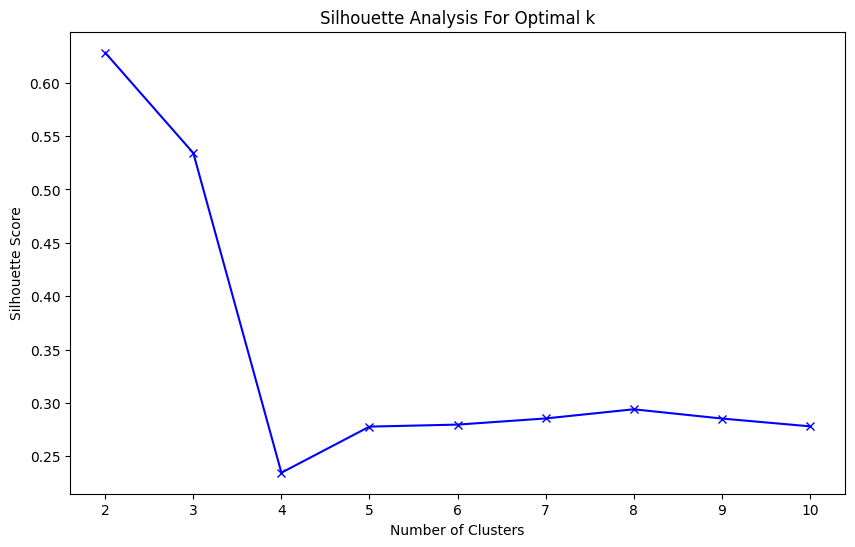

For n_clusters = 2, the average silhouette_score is : 0.6281406073013437)
For n_clusters = 3, the average silhouette_score is : 0.5341018343625767)
For n_clusters = 4, the average silhouette_score is : 0.23453877194339784)
For n_clusters = 5, the average silhouette_score is : 0.2777510560730837)
For n_clusters = 6, the average silhouette_score is : 0.2796295884082025)
For n_clusters = 7, the average silhouette_score is : 0.28539745396708893)
For n_clusters = 8, the average silhouette_score is : 0.29398538660072876)
For n_clusters = 9, the average silhouette_score is : 0.2853248273278334)
For n_clusters = 10, the average silhouette_score is : 0.27802867410831067)


In [24]:
# Define range of clusters to try
range_n_clusters = list(range(2, 11))

# Placeholder for silhouette scores
silhouette_avg = []

# Loop through the number of clusters
for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    
    # Fit and predict cluster labels for the dataset
    cluster_labels = kmeans.fit_predict(df_pca)
    
    # Calculate the silhouette score and append it to the list
    silhouette_avg.append(silhouette_score(df_pca, cluster_labels))

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Print the silhouette scores for different cluster counts
for i, score in enumerate(silhouette_avg):
    print("For n_clusters = {}, the average silhouette_score is : {})".format(i + 2, score))

## Insights

- Insihgts Teknikal:
 1. Silhouette Score Tertinggi untuk 2 Cluster: Skor silhouette tertinggi tercapai ketika hanya menggunakan 2 cluster. Ini menunjukkan bahwa pada level paling kasar, ada dua segmen yang sangat berbeda dalam dataset.
 2. Penurunan Score: Terdapat penurunan tajam dalam skor silhouette saat bergerak dari 2 ke 3 cluster, yang menunjukkan bahwa pengenalan cluster ketiga mengurangi kejelasan atau pemisahan antara segmen.
 3. Stabilisasi Skor: Mulai dari 4 cluster ke atas, skor silhouette cenderung stabil dan berada di kisaran yang lebih rendah, yang menunjukkan bahwa cluster tambahan tidak memberikan pemisahan yang signifikan antara segmen.

- Insight Bisnis:
 1. Efektivitas Segmentasi: Dari perspektif bisnis, dua segmen mungkin terlalu kasar dan tidak memberikan kekhasan yang baik untuk strategi bisnis yang akan ditetapkan. Namun, stabilitas skor silhouette pada 4 cluster atau lebih menunjukkan bahwa segmen tersebut mungkin terlalu spesifik dan tidak membedakan pelanggan dengan cara yang bermakna.
 2. Pertimbangan untuk Segmentasi: Jika bank memerlukan segmentasi yang lebih halus, mungkin akan lebih baik untuk mengeksplorasi karakteristik pelanggan dalam 3 atau 4 cluster terlepas dari penurunan skor silhouette, selama cluster tersebut memberikan insight bisnis yang berharga.

## Pertimbangan final
Berdasarkan grafik Silhouette Score dan Elbow Method yang telah dibuat, Saya dapat memberikan rekomendasi jumlah cluster dan memberikan insight teknikal serta bisnis sebagai berikut:

1. Rekomendasi Cluster Berdasarkan Silhouette Score:

 Grafik Silhouette Score menunjukkan skor yang tertinggi untuk dua cluster, yang menandakan adanya dua segmen yang sangat berbeda dalam dataset. Namun, skor menurun tajam setelah dua cluster dan cenderung stabil di angka yang lebih rendah untuk jumlah cluster yang lebih besar.

2. Rekomendasi Cluster Berdasarkan Elbow Method:
 
 Grafik Elbow Method mengindikasikan bahwa penurunan WCSS melambat setelah kira-kira 5 cluster. Ini bisa diinterpretasikan sebagai indikasi bahwa penambahan cluster setelah 5 tidak memberikan peningkatan signifikan dalam membedakan data.

- Insight Teknikal:

 Dua cluster mungkin terlalu sedikit untuk mengakomodasi keberagaman dalam data, terutama jika dataset besar dengan banyak variabel, sedangkan 5 cluster adalah titik di mana tambahan cluster tidak menyediakan nilai pemisahan yang signifikan, tetapi ini bisa memberikan segmentasi yang cukup detail tanpa menjadi terlalu spesifik. Stabilitas skor Silhouette pada jumlah cluster yang lebih besar menunjukkan bahwa data mungkin tidak memiliki struktur klaster yang jelas dan terdefinisi atau bahwa ada banyak overlap antar kluster.

- Insight Bisnis:

 Dua cluster dapat memberikan pemahaman yang sangat luas tentang pelanggan, mungkin membedakan antara pengguna aktif dan non-aktif atau antara mereka yang memiliki saldo tinggi versus rendah. 5 cluster bisa memberikan granularity yang lebih tinggi untuk strategi pemasaran, dengan memungkinkan bank untuk menargetkan segmen pelanggan dengan penawaran yang lebih khusus dan dipersonalisasi. Penting untuk memvalidasi segmentasi ini dengan data bisnis dan memahami apakah pembagian ini berguna dalam konteks praktis bisnis. Misalnya, apakah segmentasi ini membantu dalam menargetkan komunikasi pemasaran, mengembangkan produk baru, atau meningkatkan layanan pelanggan.

- Kesimpulan dan Langkah Selanjutnya:
 
 Dua atau tiga cluster mungkin tidak cukup untuk menangkap kompleksitas dan keberagaman perilaku pelanggan. Lima cluster mungkin merupakan titik awal yang baik untuk segmentasi pelanggan, tetapi ini harus diverifikasi dengan analisis lebih lanjut untuk memastikan bahwa setiap cluster memiliki karakteristik yang unik dan bermanfaat dari perspektif bisnis. Evaluasi segmentasi ini dengan data historis untuk melihat apakah terdapat korelasi antara cluster dan perilaku, tingkat kepuasan pelanggan, atau metrik kunci lainnya. Dalam pengambilan keputusan akhir, kombinasikan insight analitis ini dengan pengetahuan domain dan pertimbangan praktis terkait penerapan strategi bisnis. Strategi yang akan coba diterapkan adalah membuat segmentasi berdasrkan cluster yang terbagi menjadi 5, kemudian cluster tersebut akan dipahami secara mendetail yang kemudian akan diteruskan kepada pemangku jabatan untuk ditindak sesuai dengan kebutuha Bank

# Model Evaluation

In [25]:
# Definisikan model KMeans untuk 3 cluster

km3cluster = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km3cluster

KMeans(n_clusters=3, n_init=10, random_state=10)

# Model Training

In [26]:
# Fit-kan model K-Means (dengan 10 cluster) ke dataset

clusterRes = km3cluster.fit_predict(df_pca)

In [27]:
# Masukkan hasil clustering sebagai kolom baru

df_original['Cluster'] = clusterRes
df_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8,0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8,0
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


<Axes: >

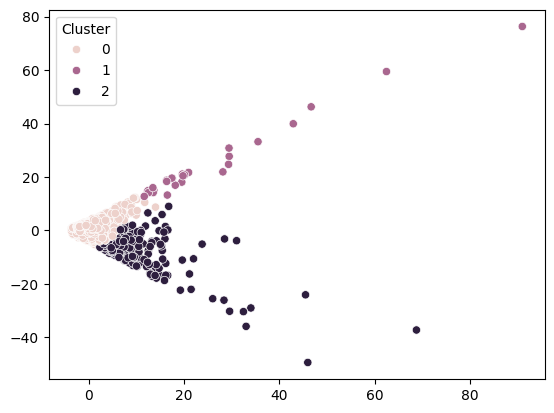

In [28]:
# Visualisasi hasil clustering

pca2d = PCA(n_components=3)
pca2d.fit(df_pca)

df1NewPCA2D = pca2d.fit_transform(df_pca)

sns.scatterplot(x=df1NewPCA2D[:,0], y=df1NewPCA2D[:,1], hue=df_original['Cluster'])

Insight Teknikal:
- Pemisahan Cluster: Cluster 0 dan 1 tampaknya terpisah dengan baik pada tingkat rendah dari komponen utama pertama, tetapi Cluster 2 tampaknya tersebar dan terpisah dari dua cluster lainnya pada nilai yang lebih tinggi dari komponen tersebut. Ini bisa menandakan bahwa Cluster 2 mungkin mewakili segmen pelanggan dengan karakteristik yang sangat berbeda dari dua cluster lainnya.

- Density dan Outliers: Cluster 0 dan 1 tampak lebih padat dan lebih terkonsentrasi dibandingkan dengan Cluster 2 yang memiliki data points yang lebih tersebar. Terdapat beberapa titik yang terletak jauh dari pusat cluster masing-masing, yang dapat dianggap sebagai outliers atau pelanggan dengan perilaku yang sangat unik.

- Kemungkinan Overlapping: Meskipun Cluster 0 dan 1 terpisah dengan baik dalam satu komponen, mungkin ada beberapa overlapping antara keduanya di komponen atau dimensi lain yang tidak terlihat dalam plot dua dimensi ini.

Insight Bisnis:
- Segmentasi Pelanggan: Setiap cluster mewakili segmen pelanggan yang berbeda. Misalnya, Cluster 0 bisa mewakili pelanggan dengan kebiasaan penggunaan kartu kredit yang moderat, Cluster 1 mungkin pelanggan dengan penggunaan yang rendah, dan Cluster 2 bisa jadi pelanggan dengan penggunaan yang sangat tinggi atau sering melakukan transaksi besar.

- Strategi Marketing: Pelanggan di Cluster 2 mungkin merupakan target yang baik untuk produk premium atau penawaran eksklusif, mengingat mereka mungkin memiliki pengeluaran lebih besar. Sebaliknya, untuk Cluster 0 dan 1, strategi pemasaran bisa difokuskan pada peningkatan frekuensi penggunaan dan promosi pembelian cicilan.

- Pelayanan dan Manajemen Risiko: Cluster dengan nilai rendah mungkin memerlukan pendekatan yang berbeda dalam hal layanan pelanggan dan manajemen risiko, mungkin dengan menawarkan opsi pembayaran fleksibel atau program loyalitas untuk meningkatkan engagement.

- Personalisasi Produk: Produk dan layanan dapat disesuaikan berdasarkan karakteristik cluster, seperti menyesuaikan limit kredit, menawarkan skema cicilan tanpa bunga, atau cashback untuk kategori pembelian tertentu.

In [29]:
# Masukkan hasil clustering sebagai kolom baru

df_original['Cluster'] = clusterRes
df_original

# Menyimpan dataframe yang diperbarui ke file CSV baru
df_original.to_csv('clusterd_dataset.csv', index=False)

# EDA Clustered Dataset

In [30]:
# Load the updated dataset
clustered_data = pd.read_csv(r'C:\Users\yossy\github-classroom\FTDS-assignment-bay\p1-ftds027-rmt-g6-Daffailh27\clusterd_dataset.csv')

# menampilkan dataset terbaru setelah ditambah cluster
clustered_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,313.980229,0.0,8,0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,313.980229,0.0,8,0
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,0


### Insihgts
- Cluster 0: Ini adalah cluster terbesar dengan 4158 pelanggan. Statistik untuk variabel seperti BALANCE, PURCHASES, dan PAYMENTS akan memberikan wawasan tentang perilaku keuangan rata-rata pelanggan dalam cluster ini.

- Cluster 1: Ini adalah cluster terkecil dengan hanya 29 pelanggan. Variabilitas dalam cluster ini bisa jadi lebih besar karena jumlah sampel yang kecil. Pelanggan dalam cluster ini bisa memiliki karakteristik yang sangat khusus atau perilaku yang ekstrem dibandingkan dengan cluster lain.

- Cluster 2: Cluster ini memiliki 288 pelanggan. Karakteristik rata-rata dan distribusi pelanggan dalam cluster ini bisa memberikan wawasan tentang segmen pelanggan yang berbeda dari Cluster 0 dan 1.

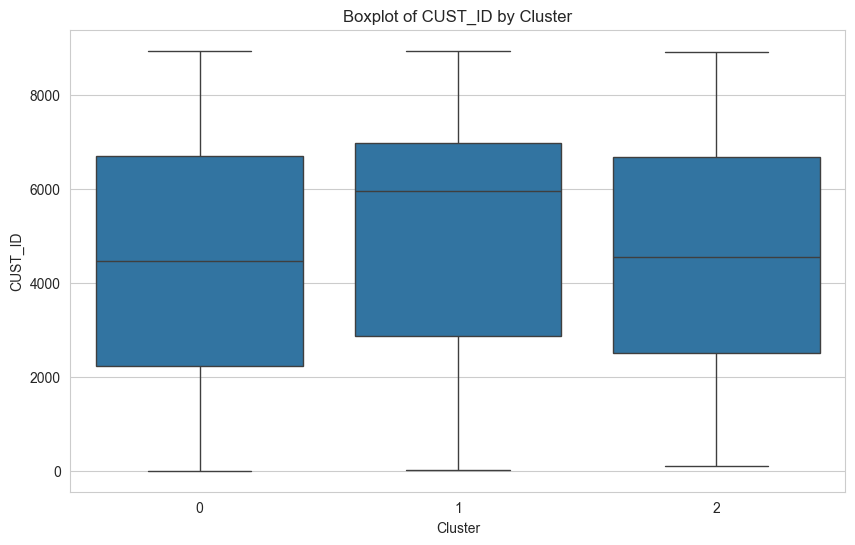

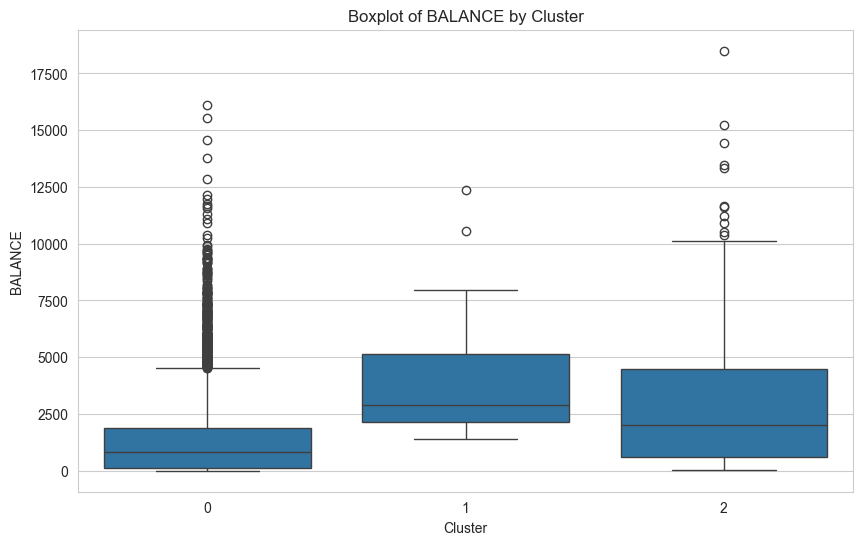

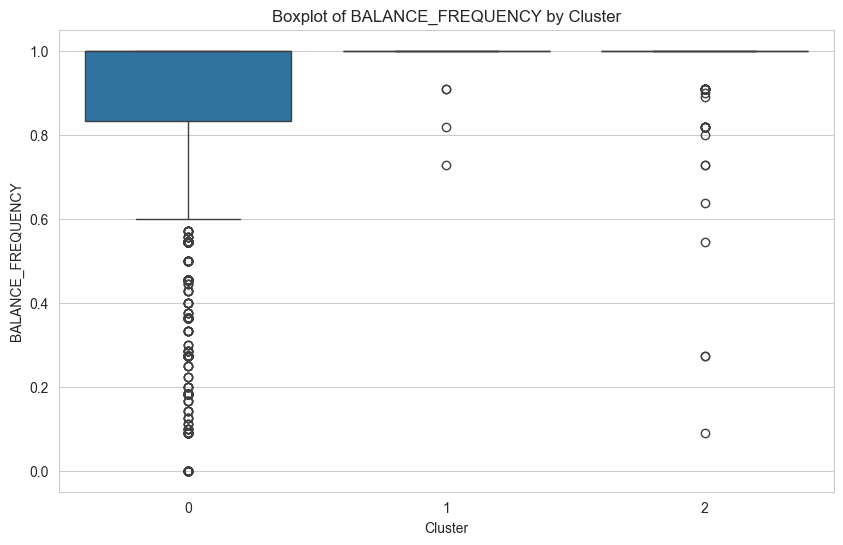

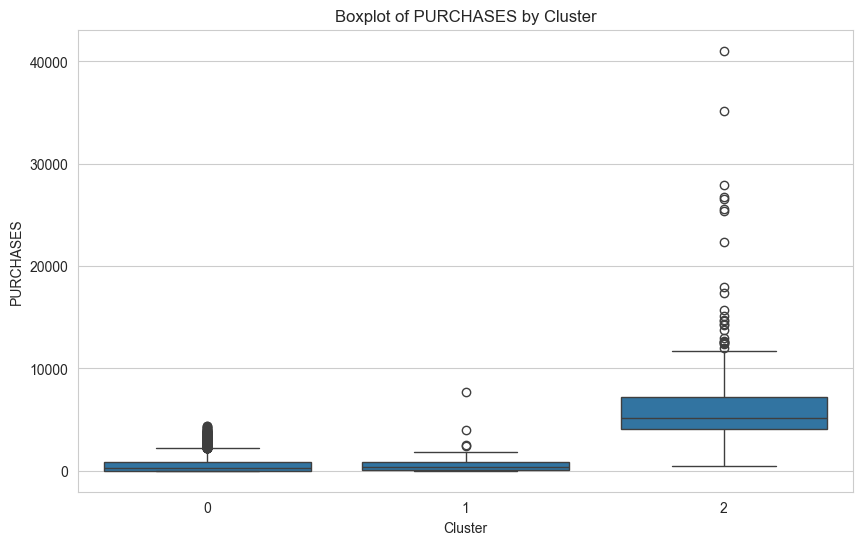

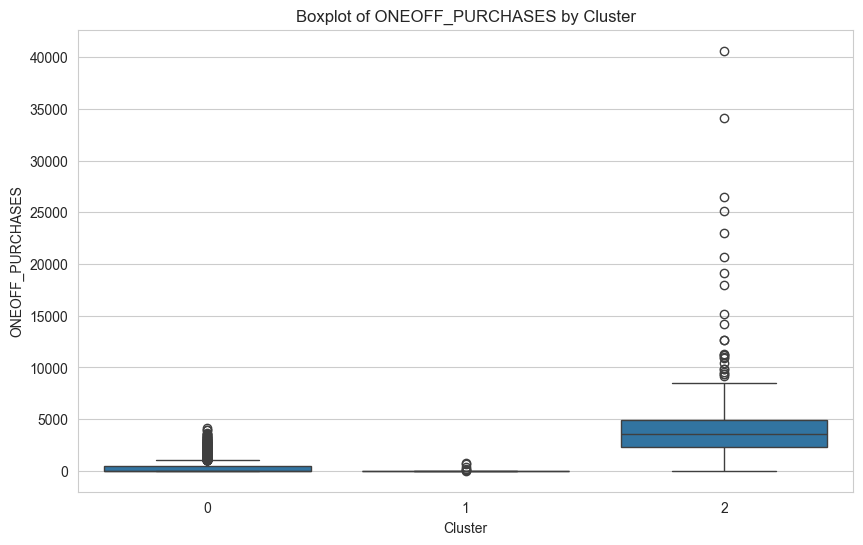

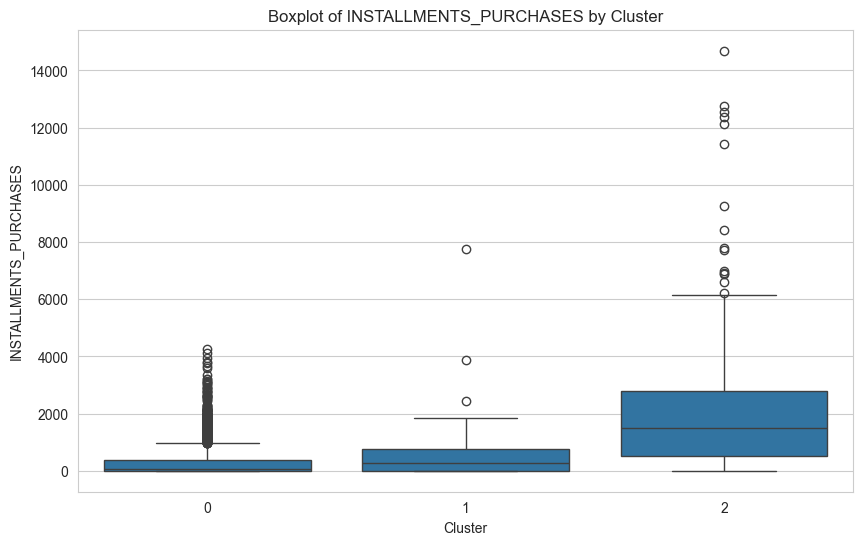

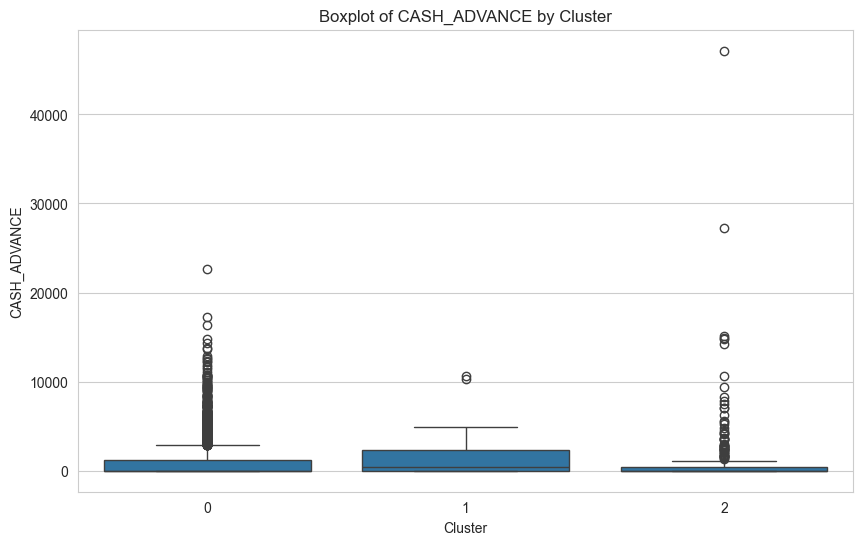

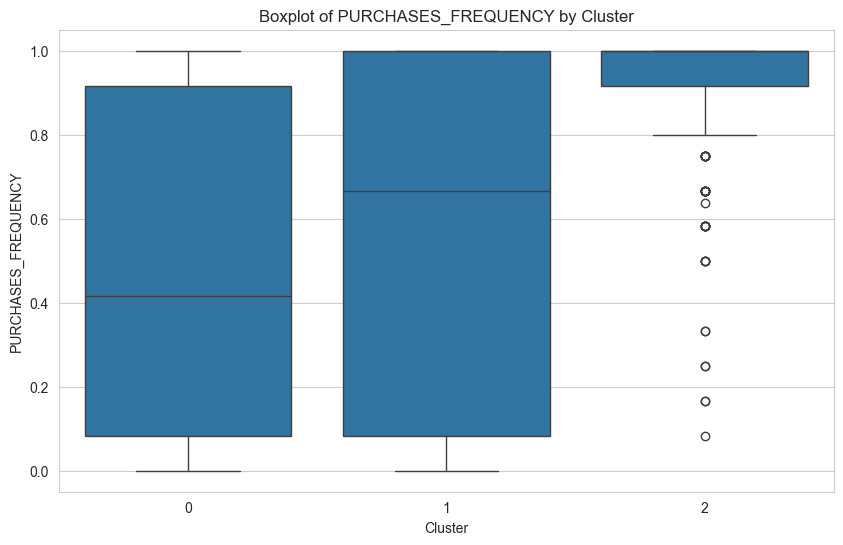

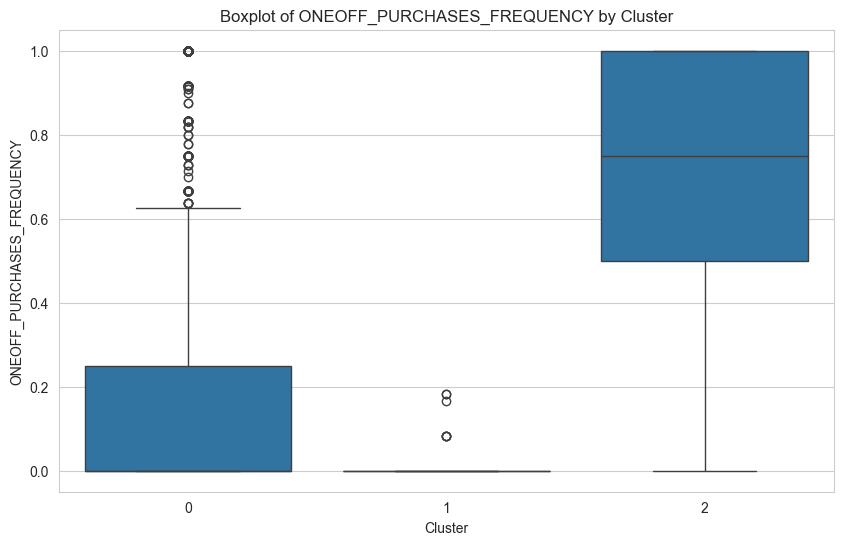

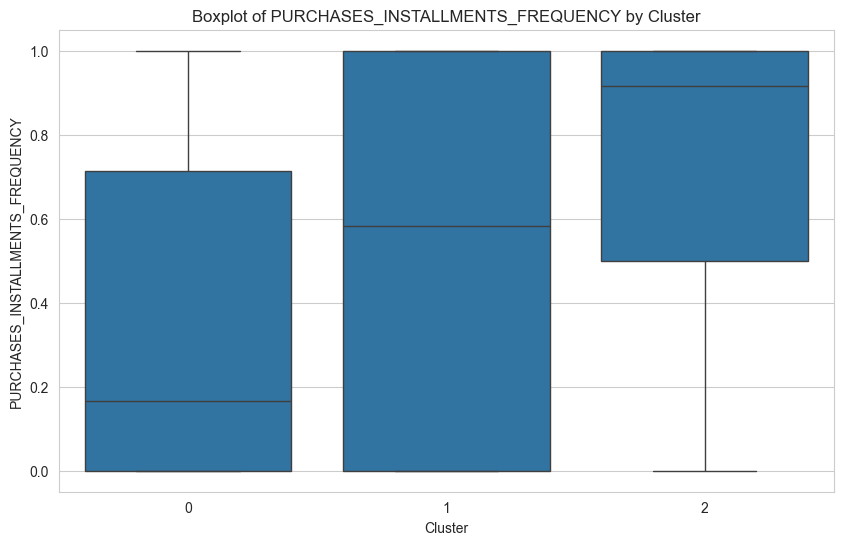

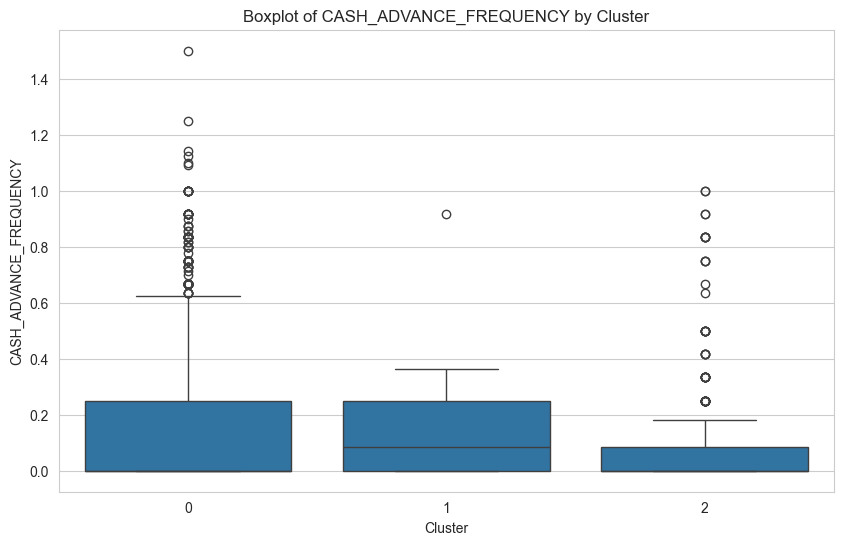

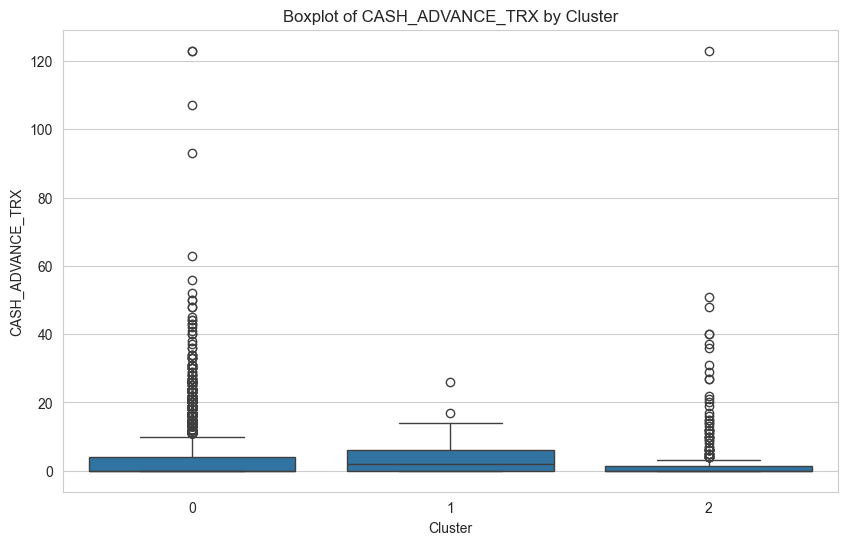

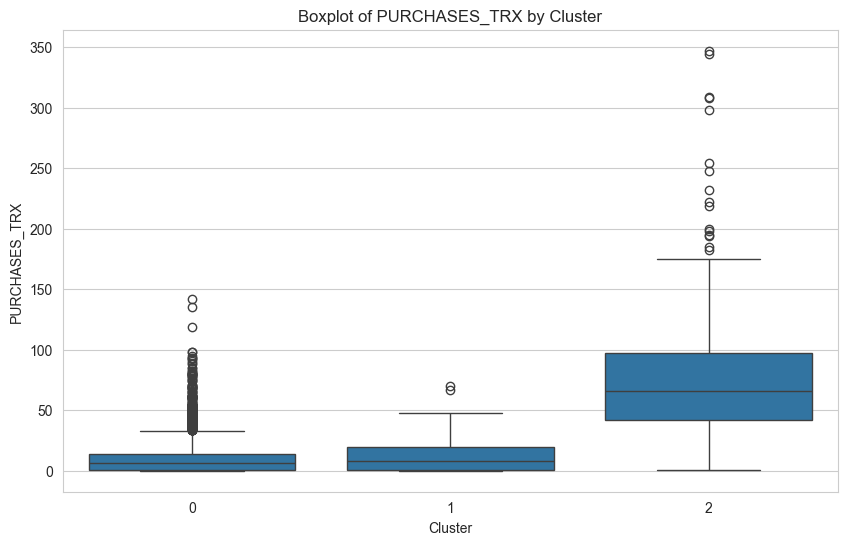

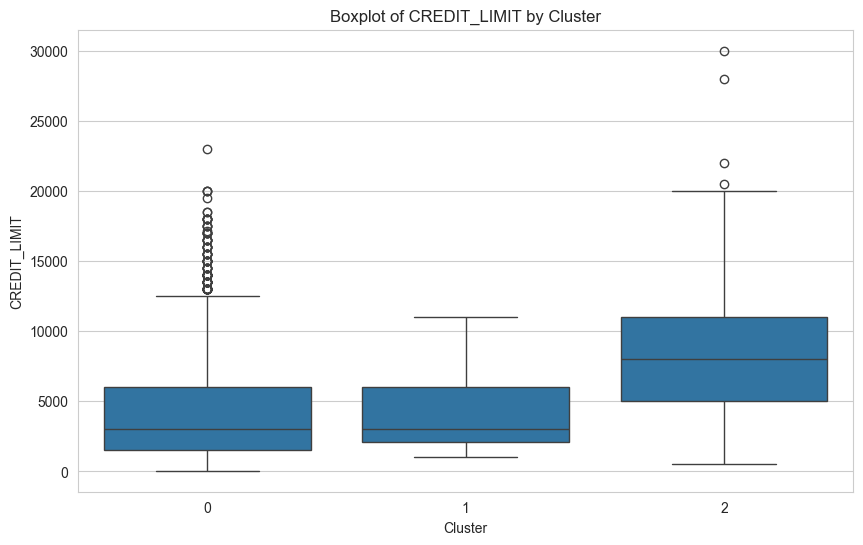

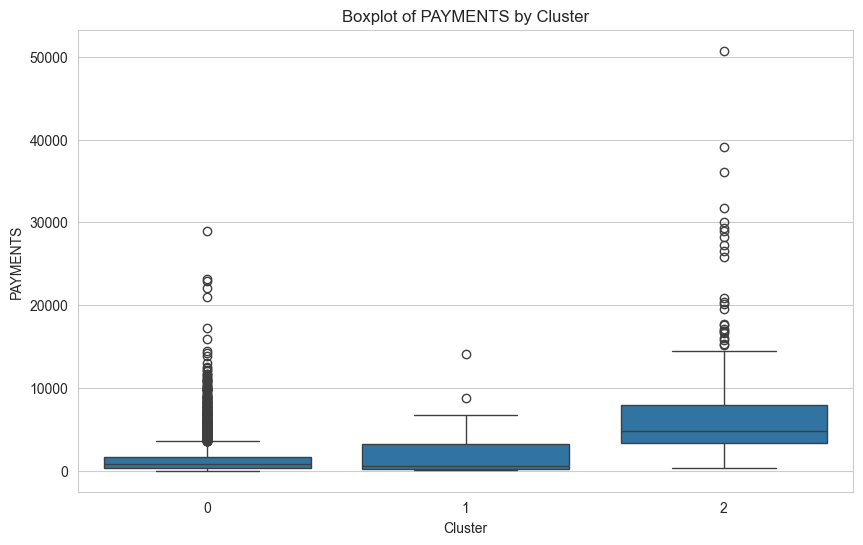

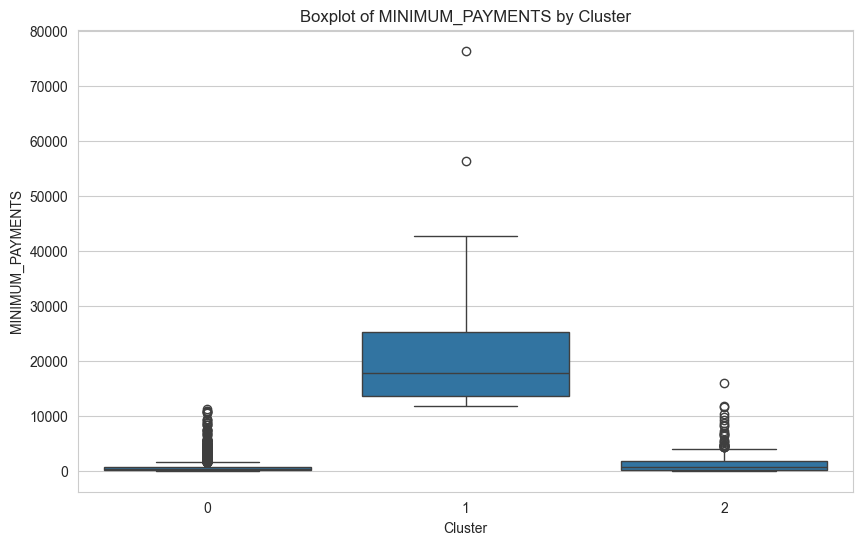

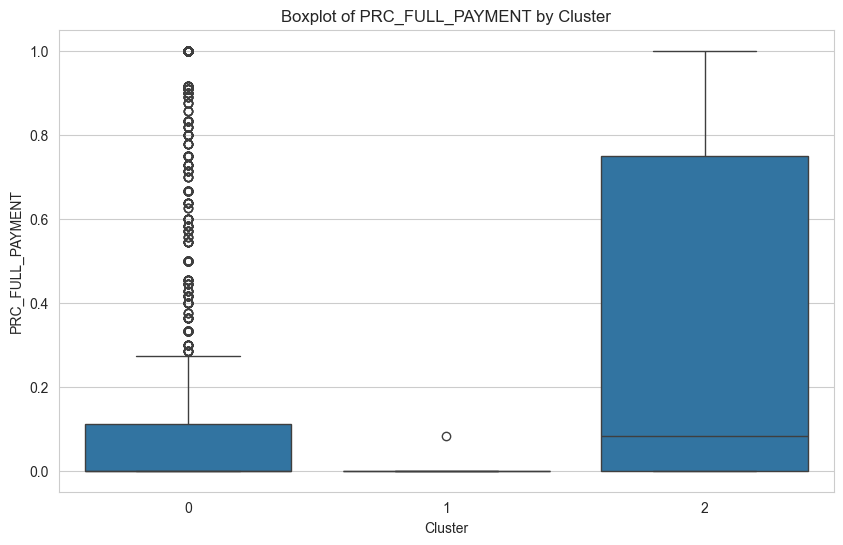

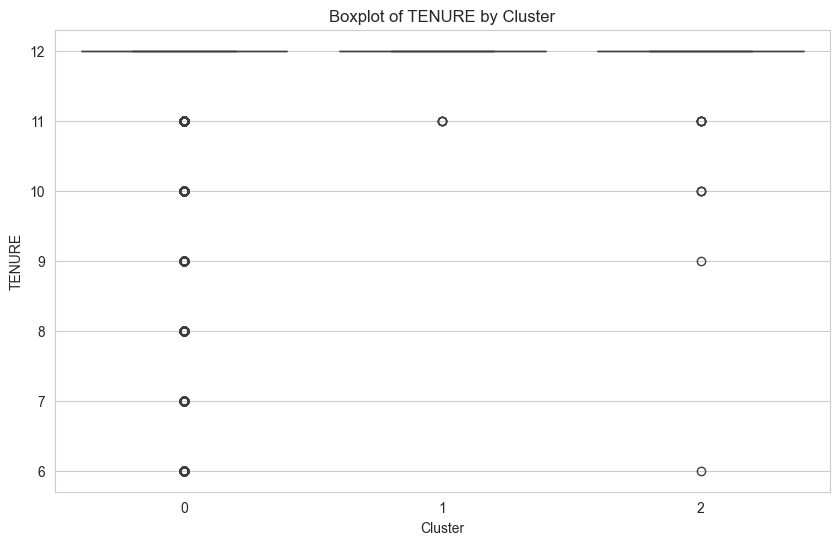

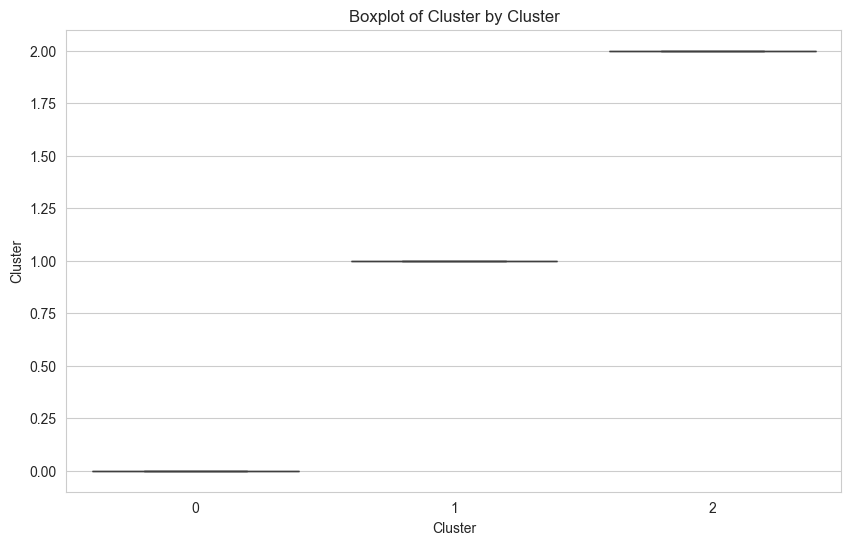

In [31]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Get a list of numerical variables to plot
numerical_variables = clustered_data.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Remove 'CUST_ID' as it is just an identifier

# Create boxplots for each numerical variable
for variable in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=variable, data=clustered_data)
    plt.title(f'Boxplot of {variable} by Cluster')
    plt.show()

### Insights

Visualisasi di atas menunjukkan boxplot untuk setiap variabel numerik terpisah oleh cluster. Boxplot menyajikan distribusi interkuartil, median, serta outlier untuk setiap cluster. Dengan ini, Anda dapat dengan cepat melihat perbedaan dalam distribusi untuk variabel seperti BALANCE, PURCHASES, CASH_ADVANCE, dan lainnya antar cluster.

Berikut adalah beberapa pengamatan yang bisa kita tarik dari visualisasi:

1. BALANCE:

Cluster 0 memiliki median saldo yang relatif rendah dengan beberapa outliers yang memiliki saldo tinggi.
Cluster 1 menunjukkan median saldo yang lebih tinggi dibandingkan dengan cluster lainnya, menandakan pelanggan ini cenderung memiliki saldo yang lebih besar pada kartu kredit mereka.
Cluster 2 memiliki distribusi saldo yang luas dengan median yang lebih rendah dari Cluster 1 tetapi lebih tinggi dari Cluster 0.

2. PURCHASES (Pembelian Total):

Cluster 0 dan Cluster 2 memiliki median pembelian yang relatif serupa, tetapi Cluster 2 memiliki outliers dengan pembelian yang sangat tinggi.
Cluster 1 memiliki median pembelian yang jauh lebih rendah, menandakan aktivitas pembelian yang lebih sedikit di grup ini.

3. ONEOFF_PURCHASES (Pembelian Sekali Bayar):

Cluster 0 dan Cluster 2 memiliki pembelian sekali bayar dengan median yang serupa dan beberapa outliers.
Cluster 1 kembali menunjukkan pembelian sekali bayar yang lebih rendah.

4. CASH_ADVANCE (Uang Muka Tunai):

Cluster 0 memiliki median uang muka tunai yang rendah.
Cluster 1 dan Cluster 2 memiliki median yang lebih tinggi, dengan Cluster 1 menunjukkan adanya outliers yang mengambil jumlah uang muka tunai yang signifikan.

5. CREDIT_LIMIT (Limit Kredit):

Cluster 0 memiliki median limit kredit yang lebih rendah dibandingkan dengan dua cluster lainnya.
Cluster 1 memiliki median limit kredit yang paling tinggi, menandakan bahwa pelanggan dalam cluster ini memiliki akses ke jumlah kredit yang lebih besar.
Cluster 2 memiliki median yang lebih tinggi daripada Cluster 0 tetapi lebih rendah dari Cluster 1.

6. PAYMENTS (Pembayaran):

Cluster 0 menunjukkan pembayaran dengan median yang lebih rendah dibandingkan dengan dua cluster lainnya.
Cluster 1 memiliki pembayaran dengan median yang paling tinggi, menandakan bahwa pelanggan di cluster ini cenderung melakukan pembayaran yang lebih besar.
Cluster 2 memiliki median pembayaran yang lebih rendah dari Cluster 1 tetapi lebih tinggi dari Cluster 0.

7. MINIMUM_PAYMENTS (Pembayaran Minimum):

Cluster 0 dan Cluster 2 memiliki median pembayaran minimum yang serupa dengan beberapa outliers.
Cluster 1 menunjukkan median pembayaran minimum yang lebih tinggi, yang bisa mengindikasikan saldo yang lebih tinggi atau syarat pembayaran minimum yang berbeda.

8. PRC_FULL_PAYMENT (Persentase Pembayaran Penuh):

Cluster 0 memiliki median persentase pembayaran penuh yang rendah.
Cluster 1 dan Cluster 2 menunjukkan median yang lebih tinggi, menandakan bahwa pelanggan di cluster ini lebih cenderung melunasi saldo mereka secara penuh.

9. TENURE (Durasi Layanan Kartu Kredit):

Semua cluster memiliki median tenure yang serupa, menunjukkan bahwa durasi layanan kartu kredit tidak banyak bervariasi antar cluster.

In [32]:
# Perform ANOVA (Analysis of Variance) to test the differences between clusters for each numerical variable
anova_results = {}
for variable in numerical_variables:
    # Create a list to store data for ANOVA
    grouped_data = [cluster[variable].dropna() for name, cluster in clustered_data.groupby('Cluster')]
    # Perform ANOVA and store the results
    f_val, p_val = stats.f_oneway(*grouped_data)
    anova_results[variable] = {'F-Statistic': f_val, 'p-value': p_val}

# Convert the ANOVA results to a DataFrame for better display
anova_results_df = pd.DataFrame(anova_results).transpose()

# Display the ANOVA results
anova_results_df.sort_values(by='p-value')

c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,F-Statistic,p-value
Cluster,inf,0.000000e+00
MINIMUM_PAYMENTS,2732.583759,0.000000e+00
PURCHASES,2306.094044,0.000000e+00
ONEOFF_PURCHASES,1436.561676,0.000000e+00
PURCHASES_TRX,1502.464198,0.000000e+00
INSTALLMENTS_PURCHASES,728.081974,1.872548e-274
PAYMENTS,690.225900,5.683170e-262
ONEOFF_PURCHASES_FREQUENCY,537.478800,6.536980e-210
CREDIT_LIMIT,235.786803,4.429214e-98
PURCHASES_FREQUENCY,192.241888,8.056573e-81


### Insights
Berdasarkan hasil uji ANOVA, variabel-variabel berikut menunjukkan perbedaan yang signifikan antara cluster dengan nilai p kurang dari 0.05:

`MINIMUM_PAYMENTS`
`PURCHASES`
`ONEOFF_PURCHASES`
`PURCHASES_TRX`
`INSTALLMENTS_PURCHASES`
`PAYMENTS`
`ONEOFF_PURCHASES_FREQUENCY`
`CREDIT_LIMIT`
`PURCHASES_FREQUENCY`
`PURCHASES_INSTALLMENTS_FREQUENCY`
`BALANCE`
`PRC_FULL_PAYMENT`
`BALANCE_FREQUENCY`
`TENURE`
`CASH_ADVANCE_FREQUENCY`

Namun, untuk `CASH_ADVANCE` dan `CASH_ADVANCE_TRX`, kita tidak menemukan perbedaan yang signifikan antara cluster (nilai p masing-masing adalah sekitar 0.09 dan 0.71).

Perlu diingat bahwa meskipun ANOVA dapat menunjukkan adanya perbedaan, itu tidak menentukan di antara cluster mana perbedaan tersebut terjadi.

# Kesimpulan

Berdasarkan analisis statistik dan visualisasi yang telah dilakukan, berikut adalah kesimpulan menyeluruh:

- Statistik Deskriptif:
 Data telah berhasil diklasifikasikan ke dalam 3 cluster yang berbeda, dengan sebagian besar pelanggan masuk ke dalam Cluster 0, sedikit lebih banyak di Cluster 2, dan hanya sedikit di Cluster 1.

- Visualisasi:
 Boxplot: Visualisasi menunjukkan bahwa terdapat perbedaan yang signifikan antara cluster untuk sebagian besar variabel. Misalnya, cluster berbeda secara signifikan dalam hal BALANCE, PURCHASES, dan PAYMENTS.
 Beberapa variabel, seperti CREDIT_LIMIT dan PAYMENTS, menunjukkan variasi yang besar di antara cluster, yang dapat menandakan perbedaan perilaku dalam 
 penggunaan dan pembayaran kartu kredit.
 Cluster 1 cenderung memiliki nilai yang lebih tinggi untuk BALANCE, PURCHASES, dan ONEOFF_PURCHASES, yang mungkin menunjukkan pelanggan dengan pengeluaran lebih tinggi atau lebih banyak aktivitas kartu kredit.

- Uji Statistik (ANOVA):
 Uji ANOVA menunjukkan adanya perbedaan yang sangat signifikan antara cluster untuk hampir semua variabel numerik yang diuji.
 Variabel seperti PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PAYMENTS, dan CREDIT_LIMIT memiliki p-value yang sangat rendah, menunjukkan bahwa rata-rata cluster untuk variabel-variabel tersebut berbeda secara signifikan.
 Variabel CASH_ADVANCE dan CASH_ADVANCE_TRX tidak menunjukkan perbedaan yang signifikan antar cluster, yang bisa menunjukkan bahwa perilaku terkait penarikan tunai tidak menjadi faktor pembeda yang kuat antara cluster yang berbeda.

- Insights Bisnis:
 Cluster 0: Mungkin mewakili pelanggan dengan aktivitas kartu kredit yang lebih rendah. Strategi bisnis untuk cluster ini mungkin meliputi peningkatan kesadaran tentang manfaat menggunakan kartu kredit dan promosi untuk meningkatkan penggunaan.
 
 Cluster 1: Ini tampaknya adalah segmen pelanggan 'high-value' dengan tingkat pembelian dan saldo yang lebih tinggi. Mereka bisa menjadi target utama untuk penawaran premium dan layanan khusus karena potensi pendapatan yang lebih besar dari segmen ini.
 
 Cluster 2: Pelanggan di cluster ini mungkin berada di antara Cluster 0 dan 1 dalam hal aktivitas kartu kredit, menunjukkan penggunaan yang moderat. Program loyalitas dan penawaran insentif bisa digunakan untuk meningkatkan interaksi dan transaksi mereka.

- Rekomendasi kepada pemangku jabata:
 Personalisasi Penawaran: Berdasarkan karakteristik cluster, bank dapat menyesuaikan penawaran dan layanan untuk memenuhi kebutuhan dan preferensi pelanggan di setiap segmen.

 Fokus pada Retensi dan Pengembangan: Untuk cluster dengan nilai transaksi yang lebih rendah, fokuskan pada retensi dan pengembangan dengan mempromosikan produk dan layanan yang sesuai.
 
 Optimisasi Limit Kredit: Untuk pelanggan dengan pengeluaran tinggi dan pembayaran yang baik, bank dapat mempertimbangkan meningkatkan limit kredit untuk mendorong penggunaan lebih lanjut.


# Model Saving

In [ ]:
# Simpan model

with open ('kMeansCluster.pkl', 'wb') as file1:
  pickle.dump(km3cluster, file1)

# Model Inference

In [33]:
# Data baru

newData = {
    'CUST_ID': 999,
    'BALANCE': 34.0,
    'BALANCE_FREQUENCY': 0.25,
    'PURCHASES': 0.0,
    'ONEOFF_PURCHASES': 0.0,
    'INSTALLMENTS_PURCHASES': 0.0,
    'CASH_ADVANCE': 1.0,
    'PURCHASES_FREQUENCY': 0.0,
    'ONEOFF_PURCHASES_FREQUENCY': 0.0,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
    'CASH_ADVANCE_FREQUENCY': 0.0,
    'CASH_ADVANCE_TRX': 0.0,
    'PURCHASES_TRX': 0.0,
    'CREDIT_LIMIT': 0.0,
    'PAYMENTS': 1.0,
    'MINIMUM_PAYMENTS': 0.0,
    'PRC_FULL_PAYMENT': 0.0,
    'TENURE': 12
}

# Buat dataframe baru
newDataDF = pd.DataFrame(newData, index=[0])

In [34]:
newDataDF

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,999,34.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12


In [35]:
# Substitusikan data baru ke dataframe utama
# Dibuat dataframe baru yang isinya dataframe utama + data baru
dfInf = pd.concat([df, newDataDF], ignore_index=True)
dfInf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,6.0,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18.0,0.0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11.0,0.0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10.0,0.0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.000,205.00,205.00,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7.0,1.0,10500.0,665.239171,817.844662,0.0,11


In [36]:
# Replace semua missing value dataframe yang berisi data baru

dfInf['MINIMUM_PAYMENTS'].fillna(dfInf['MINIMUM_PAYMENTS'].median(), inplace=True)

In [37]:
# Pemisahan data baru untuk scaling
dfInfRob = dfInf.drop(['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis=1)
dfInfMiMa = dfInf[['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']]

# Scaling data baru (disesuaikan dengan scalernya)
dfInfRobScled = Rscaler.transform(dfInfRob)
dfInfMiMaScled = Mscaler.transform(dfInfMiMa)

# Buat dataframe baru dari data-data yang telah discale
dfInfRobScledDF = pd.DataFrame(dfInfRobScled, columns = df1RobSclCol)
dfInfMiMaScledDF = pd.DataFrame(dfInfMiMaScled, columns = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'])

# Gabungkan DataFrame yang telah discale
df_scaledinf = pd.concat([dfInfRobScledDF, dfInfRobScledDF], axis=1)

In [38]:
df_scaledinf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.309343,-0.451097,-7.875008,-0.296370,-0.001130,-0.194391,0.000000,0.166668,0.00000,0.00,...,0.000000,0.166668,0.00000,0.00,-0.3750,-0.510204,-0.571776,-0.000094,0.0,-4.0
1,0.132767,-0.453090,-9.000009,-0.173090,0.226661,-0.194391,0.000000,0.166668,0.00000,0.00,...,0.000000,0.166668,0.00000,0.00,-0.3750,0.816327,-0.571776,-0.000094,0.0,-4.0
2,0.357622,-0.058961,-1.125001,-0.190618,0.194273,-0.194391,0.000000,0.166668,0.00000,0.00,...,0.000000,0.166668,0.00000,0.00,-0.0625,-0.367347,0.402028,3.776822,0.0,-4.0
3,0.405901,-0.315520,-5.625006,0.743278,1.919874,-0.194391,0.000000,0.166668,0.00000,0.00,...,0.000000,0.166668,0.00000,0.00,-0.3750,-0.367347,1.402169,-0.371329,0.0,-4.0
4,0.733125,-0.223979,0.000000,0.225806,0.963718,-0.194391,0.000000,0.166668,0.00000,0.00,...,0.000000,0.166668,0.00000,0.00,-0.3750,-0.408163,-0.431475,-0.286166,0.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,0.516316,0.087708,0.000000,-0.338709,-0.079361,-0.194391,1.221058,-0.333332,2.18182,4.50,...,1.221058,-0.333332,2.18182,4.50,-0.4375,-0.326531,-0.382727,-0.042220,0.0,-1.0
4472,0.641931,0.234753,0.000000,-0.338709,-0.079361,-0.194391,0.669338,-0.333332,2.18182,2.75,...,0.669338,-0.333332,2.18182,2.75,-0.4375,-0.306122,0.103039,-0.001860,0.0,-1.0
4473,0.887796,0.098296,0.000000,-0.338709,-0.079361,-0.194391,1.295877,-0.333332,2.18182,2.50,...,1.295877,-0.333332,2.18182,2.50,-0.4375,-0.204082,-0.306339,-0.059944,0.0,-1.0
4474,-0.554314,1.339643,0.000000,-0.145833,0.277024,-0.194391,3.993421,0.030304,2.18182,1.75,...,3.993421,0.030304,2.18182,1.75,-0.3750,1.530612,-0.138306,0.818632,0.0,-1.0


In [39]:
df_pcainf = pca.transform(df_scaled)

In [40]:
# PCA (pastikan pcaFiveComp sudah di-fit dengan data training sebelumnya)
dfInfFinal = pcaFiveComp.transform(df_pcainf)

c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [41]:
# Eksekusi model clustering dan cetak hasilnya

clusterResNew = kmeans.fit_predict(dfInfFinal)

c:\Users\yossy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
# Menambahkan nilai tambahan ke clusterResNew, misal 0 atau nilai lain yang relevan
clusterResNew = np.append(clusterResNew, [0])  # Anggap 0 adalah nilai yang ingin ditambahkan

In [43]:
# Menambahkan kolom 'Cluster' ke dfInf
dfInf['Cluster'] = clusterResNew

# Cetak 1 baris terakhir untuk memverifikasi
print(dfInf['Cluster'].tail(1))

4475    0
Name: Cluster, dtype: int32


Model K-Means yang telah disetup pada notebook ini menggolongkan data baru, `newData`, ke cluster 0.